In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cross_validation, preprocessing, linear_model
import sklearn
sklearn.__version__

/Users/takeisatoshisui/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'0.19.1'

In [12]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [13]:
X_rm = df[['RM']].values
X = df.iloc[: , 0:13]
#X=df[['Age']].Values
Y = df['MEDV'].values

In [14]:
#データの整形
sc = preprocessing.StandardScaler()
sc.fit(X)
X = sc.transform(X)
sc.fit(X_rm)
X_rm= sc.transform(X_rm)

In [15]:
#学習データとテストデータに分ける
X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(X,Y,test_size = 0.2 , random_state=0)
X_rm_train,X_rm_test,Y_train,Y_test = cross_validation.train_test_split(X_rm, Y, test_size = 0.2, random_state=0)

In [17]:
#SGD Regressorを適用する
clf = linear_model.SGDRegressor(max_iter= 1000)
clf.fit(X_train , Y_train)
clf_rm = linear_model.SGDRegressor(max_iter = 1000)
clf_rm.fit(X_rm_train,Y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [18]:
print('全部使用したときの回帰式の係数')
print(clf.intercept_)
print(clf.coef_)

全部使用したときの回帰式の係数
[22.48220585]
[-1.01940489  1.03897561  0.04588307  0.59423139 -1.86291066  2.60204422
 -0.07923522 -2.92292222  2.13066608 -1.83944985 -2.26043139  0.73443646
 -3.51050433]


<function matplotlib.pyplot.show(*args, **kw)>

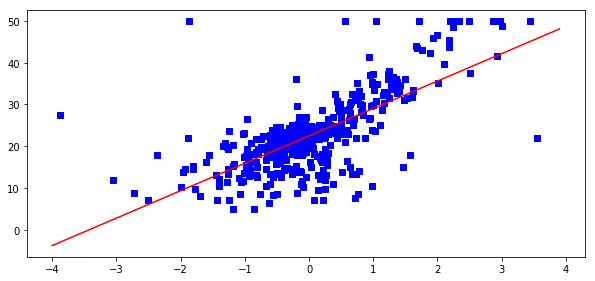

In [20]:
#結果をプロットする
%matplotlib inline
line_X=np.arange(-4,4,0.1) #3から10まで1刻み
line_Y = clf_rm.predict(line_X[:,np.newaxis])
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.scatter(X_rm_train, Y_train, c = 'b' , marker='s')
plt.plot(line_X , line_Y, c = 'r')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

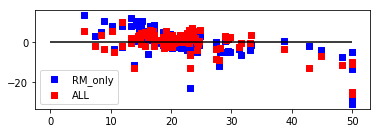

In [21]:
#誤差をプロットする
Y_rm_pred = clf_rm.predict(X_rm_test)
plt.subplot(2,1,2)
plt.scatter(Y_test, Y_rm_pred-Y_test, c = 'b' , marker='s',label = 'RM_only')

Y_pred = clf.predict(X_test)
plt.scatter(Y_test,Y_pred-Y_test, c= 'r' , marker = 's' , label = 'ALL')
plt.legend()
plt.hlines(y=0, xmin=0,xmax=50 , colors='black')
plt.show

In [23]:
print("/n「RMだけの平均2乗誤差」と「全部を使用したときの平均二乗誤差」")
RMS = np.mean((Y_pred - Y_test)**2)
RMS_rm = np.mean((Y_rm_pred - Y_test)**2)
print(RMS_rm)
print(RMS)

/n「RMだけの平均2乗誤差」と「全部を使用したときの平均二乗誤差」
46.89382309698546
33.302465496786006
